In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np

from made import MADE

In [3]:
import matplotlib.pyplot as plt

In [4]:
from data.toydata import ToyDataset

In [5]:
from flows import create_iaf
from flows import create_maf
from flows import create_paf
from flows import create_realnvp
from flows import create_flows

In [6]:
from train import train_forward
from scores import log_likelihood
from scores import difference_loglik

In [7]:
from structure.ar import AR
from structure.iar import IAR
from structure.twoblock import TwoBlock

from transforms.affine import Affine
from transforms.piecewise import PiecewiseAffine

In [8]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 8
perm_type = 'alternate'

In [9]:
dataset = ToyDataset()

In [10]:
transformations = [Affine, Affine, PiecewiseAffine, PiecewiseAffine, Affine, Affine, PiecewiseAffine, PiecewiseAffine]
structures = IAR

In [11]:
#flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_maf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_paf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_realnvp(dim_input, dim_hidden, num_trans, perm_type)
flow = create_flows(dim_input, dim_hidden, num_trans, perm_type, structure=structures, transformation=transformations)

In [12]:
optimizer = torch.optim.AdamW(flow.parameters(), lr=1e-3)

In [13]:
base_distr = flow.get_base_distr()

In [15]:
loss = train_forward(flow, base_distr, dataset.get_training_data(), optimizer, epochs=200, batch_size=16,print_n=10)

     2.32807


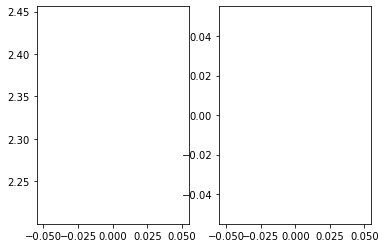

In [16]:
plt.subplot(1,2,1)
plt.plot(loss)

plt.subplot(1,2,2)
plt.plot(loss[20:])

In [17]:
train_data = dataset.get_training_data()

In [18]:
with torch.no_grad():
    sample, log_prob = flow.sample(800)
    sample_last = sample[-1].detach().cpu().numpy()

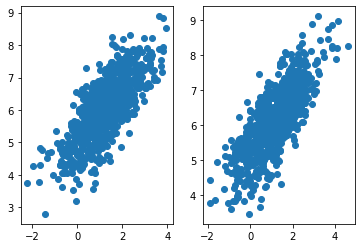

In [20]:
#xlims = (np.min(sample_last[:,0], train_data[:,0]), np.max(sample_last[:,0], train_data[:,0]))

plt.subplot(1,2,1)
plt.scatter(sample_last[:,0], sample_last[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

plt.subplot(1,2,2)
plt.scatter(train_data[:,0], train_data[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

In [21]:
log_prob_target = dataset.evaluate(sample[-1])
torch.mean(torch.abs(log_prob_target - log_prob))

tensor(0.3279)

In [22]:
with torch.no_grad():
    z_train, log_prob_train = flow.evaluate(train_data)

In [23]:
log_prob_train_target = dataset.evaluate(train_data)

In [24]:
torch.mean(torch.abs(log_prob_train_target-log_prob_train))

tensor(0.1411)

In [25]:
torch.mean(log_prob_train), torch.mean(log_prob_train_target)

(tensor(-2.3065), tensor(-2.3199))

In [26]:
test_data = dataset.get_test_data()

In [27]:
with torch.no_grad():
    z_train, log_prob_test = flow.evaluate(test_data)

In [28]:
log_prob_test_target = dataset.evaluate(test_data)

In [29]:
torch.mean(torch.abs(log_prob_test_target-log_prob_test))

tensor(0.1466)

In [30]:
torch.mean(log_prob_test), torch.mean(log_prob_test_target)

(tensor(-2.3726), tensor(-2.3536))

In [31]:
log_lik, mean = log_likelihood(train_data, flow)

In [32]:
log_lik_diff, mean_diff = difference_loglik(train_data, dataset, flow)

In [33]:
log_lik_diff, mean_diff

([array([9.08951759e-02, 8.76883984e-01, 1.64170027e-01, 1.52239561e-01,
         1.45742893e-02, 3.18956375e-03, 8.14557076e-03, 2.85224915e-02,
         3.37977409e-02, 1.30442977e-01, 1.38920307e-01, 2.51942635e-01,
         3.96106243e-02, 3.06208134e-02, 1.26931667e-02, 5.81073761e-03,
         1.53660774e-02, 2.49399662e-01, 1.14476681e-01, 3.98430824e-02,
         1.54422760e-01, 1.93402767e-02, 4.90939617e-03, 1.36116982e-01,
         1.36224747e-01, 2.50711203e-01, 1.37756109e-01, 1.68788433e-03,
         2.31783867e-01, 8.04684162e-01, 3.77255917e-01, 1.21406317e-01,
         6.90796375e-02, 3.78674030e-01, 1.54779911e-01, 1.49735928e-01,
         1.35419369e-02, 1.15914345e-02, 1.04376554e-01, 7.57102966e-02,
         1.71780109e-01, 1.87077522e-02, 1.37126684e-01, 1.37186050e-03,
         4.23929453e-01, 4.75192070e-03, 1.58579350e-01, 5.87985516e-02,
         7.75504112e-03, 1.22489095e-01, 2.82895565e-02, 9.23616886e-02,
         9.89882946e-02, 5.96978664e-02, 4.39033508